In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom, uniform
import arviz as az
#import pymc as pm
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import beta



WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.


IndexError: list index out of range

### Calcula y grafica la distribución posterior para las dos versiones A y B usando prior conjugado(2 pts).

In [8]:
data = pd.read_csv('./ABtesting_zapatillas.csv')
alpha_prior = 10
beta_prior = 50

data_A = data["A"]
data_B = data["B"]

posterior_A = beta(alpha_prior + sum(data_A), beta_prior + len(data_A) - sum(data_A))
posterior_B = beta(alpha_prior + sum(data_B), beta_prior + len(data_B) - sum(data_B))

samples_A = posterior_A.rvs(10000)
samples_B = posterior_B.rvs(10000)

#guardar la variable data en un archivo csv y que los numeros sean enteros
data.to_csv('data.csv', index=False, header=False, sep=' ')

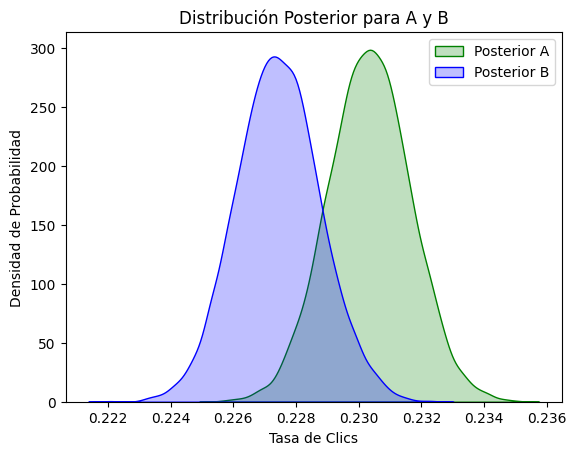

In [3]:
sns.kdeplot(samples_A, fill=True, color="green", label="Posterior A")
sns.kdeplot(samples_B, fill=True, color="blue", label="Posterior B")
plt.xlabel('Tasa de Clics')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.title('Distribución Posterior para A y B')
plt.show()


### Calcula y grafica la distribución posterior para las dos versiones A y B usando muestreo Monte Carlo Markov Chain

In [14]:
L1 = list(data["A"])
L2 = list(data["B"])